In [85]:
import numpy as np
import pandas as pd

In [86]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [87]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4523,ham,I've sent Ì_ my part..,NaN,NaN,NaN
2526,ham,Do u noe how 2 send files between 2 computers?,NaN,NaN,NaN
1586,ham,There are no other charges after transfer char...,NaN,NaN,NaN
187,spam,Please call our customer service representativ...,NaN,NaN,NaN
1253,ham,Mum say we wan to go then go... Then she can s...,NaN,NaN,NaN


In [88]:
df.shape

(5572, 5)

1. Data Clening


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [90]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [91]:
df.sample(5)

,v1,v2
1632,ham,Hello my little party animal! I just thought I...
1934,ham,Hope you are having a great day.
2653,ham,Sorry da:)i was thought of calling you lot of ...
1572,spam,Ur cash-balance is currently 500 pounds - to m...
5035,spam,You won't believe it but it's true. It's Incre...


In [92]:
df.rename(columns={'v1':'target', 'v2':'text'},inplace=True)
df.sample(5)

,target,text
4838,ham,That's one of the issues but california is oka...
2916,ham,Yes. that will be fine. Love you. Be safe.
2561,ham,And maybe some pressies
5323,ham,Aah bless! How's your arm?
644,ham,Allo! We have braved the buses and taken on th...


In [93]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [94]:
df['target']=encoder.fit_transform(df['target'])

0 = ham ,
1 = spam 

In [95]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [96]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [97]:
df.duplicated().sum()

np.int64(403)

In [98]:
df=df.drop_duplicates(keep='first')

In [99]:
df.duplicated().sum()
df.shape

(5169, 2)

2.EDA


In [100]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

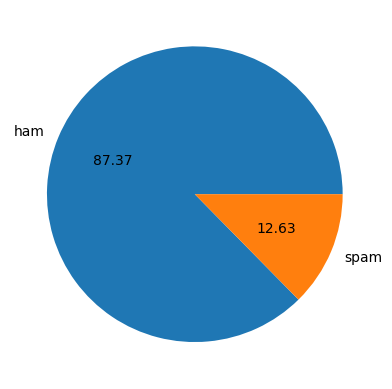

In [102]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [103]:
import nltk

In [104]:
# nltk.download('punkt_tab')
import nltk
import os

# Set download directory to your current project folder
nltk_data_dir = os.path.join(os.getcwd(), 'nltk_data')
nltk.data.path.append(nltk_data_dir)

# Download stopwords to your project folder
nltk.download('stopwords', download_dir=nltk_data_dir)
nltk.download('punkt_tab', download_dir=nltk_data_dir)

[nltk_data] Downloading package stopwords to d:\ML-lab\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to d:\ML-lab\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [105]:
df['num_characters']=df['text'].apply(len)

In [106]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [107]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [108]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [109]:
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [110]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [111]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [112]:
#ham
df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [113]:
#spam
df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [114]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

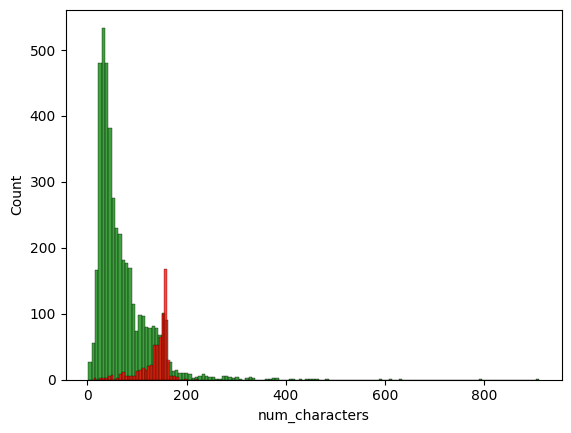

In [115]:
sns.histplot(df[df['target']==0]['num_characters'], color='green')
sns.histplot(df[df['target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

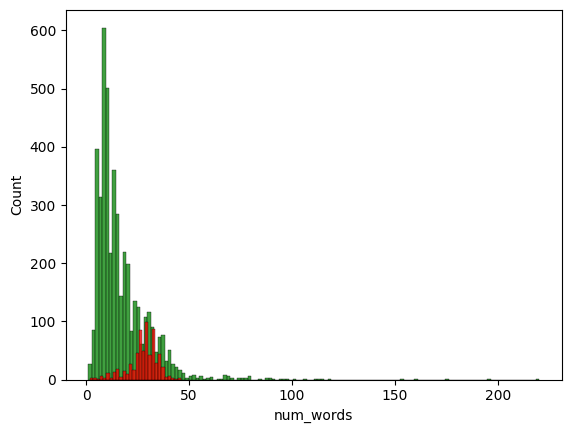

In [116]:
sns.histplot(df[df['target']==0]['num_words'], color='green')
sns.histplot(df[df['target']==1]['num_words'], color='red')

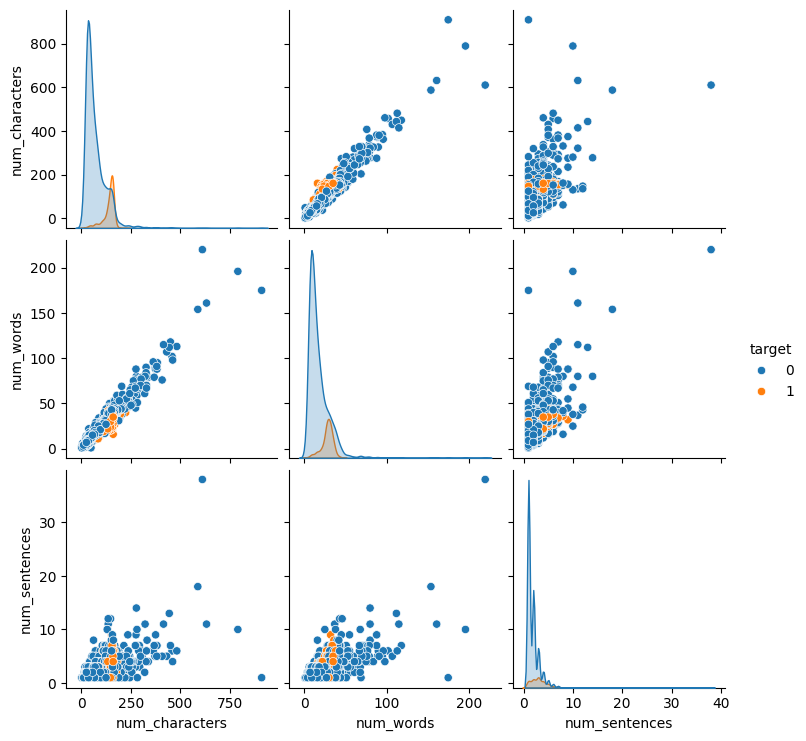

In [117]:
sns.pairplot(df, hue='target')

<Axes: >

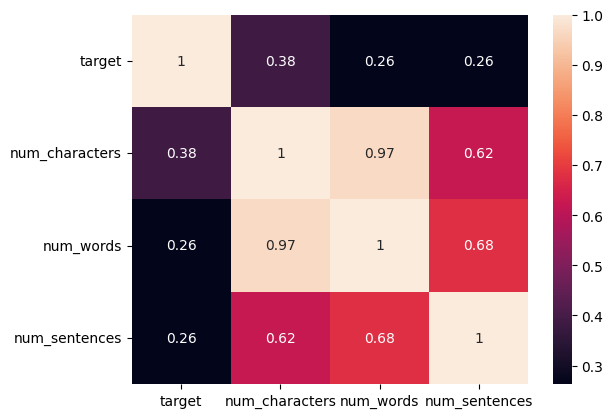

In [118]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

3. Data Preprocessing

In [119]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    y=[]
    #remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)

    text=y[:]
    y.clear()
    # remove stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()
     # stemming
    for i in text:
        y.append(ps.stem(i)) 

    return " ".join(y)

In [120]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [121]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [122]:
df['transformed_text'] = df['text'].apply(transform_text)

In [123]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [124]:
from wordcloud import WordCloud
wc= WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [125]:
spam_wc= wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

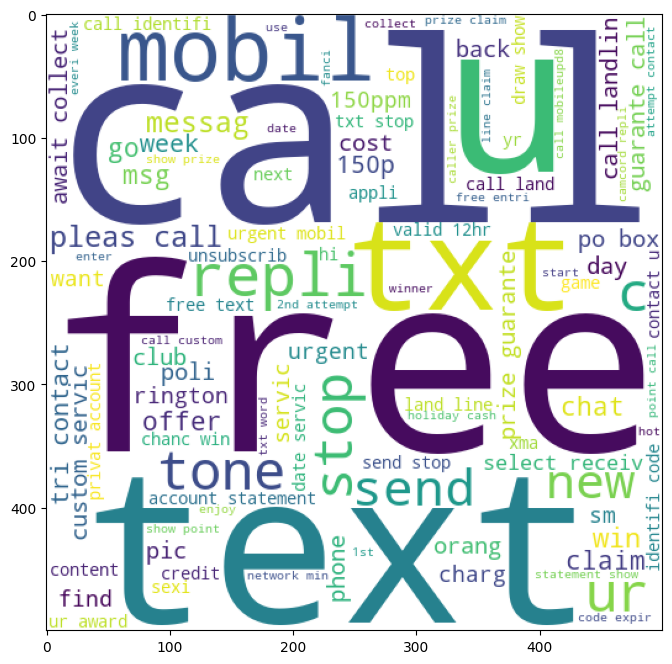

In [126]:
plt.figure(figsize=(20,8))
plt.imshow(spam_wc)

In [127]:
ham_wc= wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

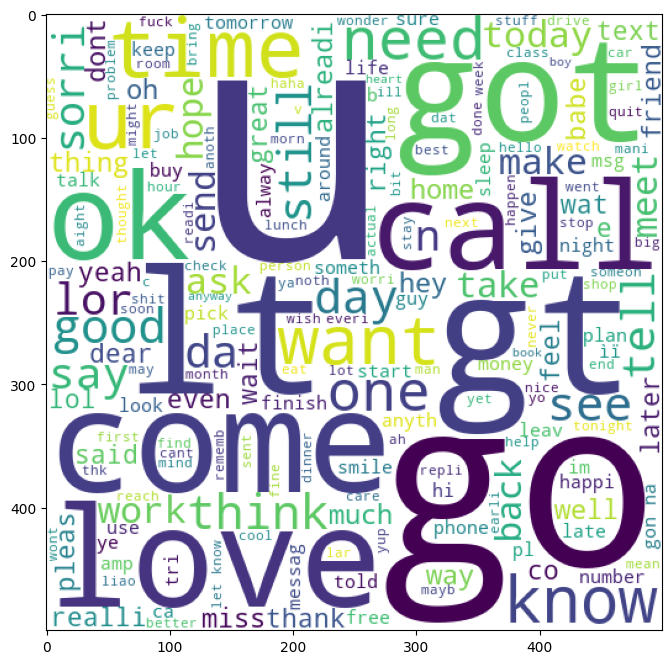

In [128]:
plt.figure(figsize=(20,8))
plt.imshow(ham_wc)

In [129]:
spam_corpus=[]
for msg in df[df['target']==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [130]:
len(spam_corpus)

9939

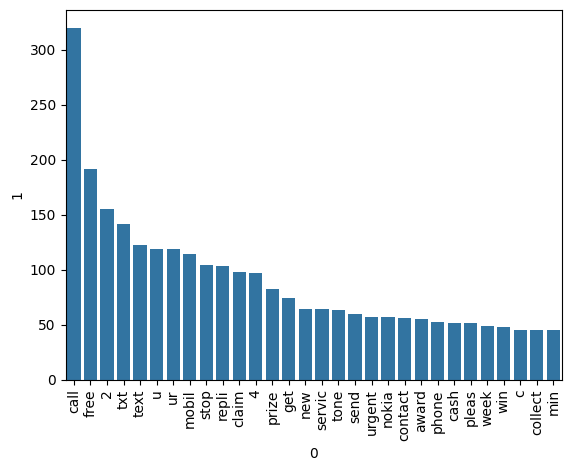

In [131]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [132]:
ham_corpus=[]
for msg in df[df['target']==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [133]:
len(ham_corpus)

35404

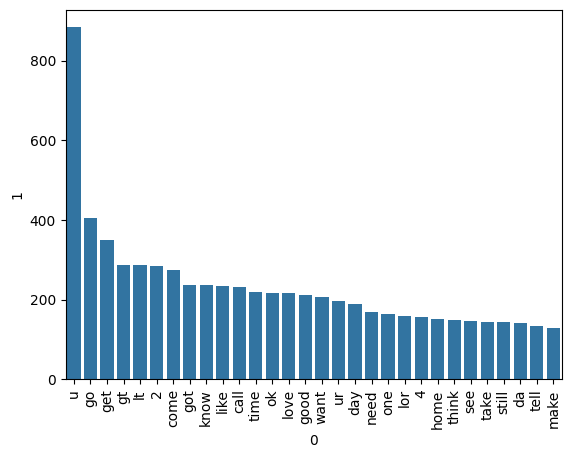

In [134]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

4.Model Building

In [135]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tfidf= TfidfVectorizer()
cv=CountVectorizer()

In [136]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [137]:
x.shape

(5169, 6708)

In [138]:
y=df['target'].values

In [139]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [141]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [142]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [143]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [144]:
gnb.fit(x_train, y_train)
y_pred1=gnb.predict(x_test)
print(" Naive Bayes Accuracy: ", accuracy_score(y_test, y_pred1))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Precision Score: ", precision_score(y_test, y_pred1))

 Naive Bayes Accuracy:  0.8762088974854932
Confusion Matrix:
 [[793 103]
 [ 25 113]]
Precision Score:  0.5231481481481481


In [145]:
mnb.fit(x_train, y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print( precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [146]:
bnb.fit(x_train, y_train)
y_pred3=mnb.predict(x_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print( precision_score(y_test, y_pred3))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [148]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dtc= DecisionTreeClassifier(max_depth=5)
lrc= LogisticRegression(solver='liblinear', penalty='l1')
rfc= RandomForestClassifier(n_estimators=50, random_state=2)
abc= AdaBoostClassifier(n_estimators=50, random_state=2)
bgc= BaggingClassifier(n_estimators=50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt= GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [149]:
clfs={
  'SVC': svc,
  'KN': knc,
  'NB': mnb,
  'DT': dtc,
  'RF': rfc,
  'LR':lrc,
  'AdaBoost': abc,
  'Bgc': bgc,
  'ETC': etc,
  'GBDT': gbdt,
  'XGB': xgb
}

In [150]:
# def train_classifier(clf, x_train, y_train, x_test, y_test):
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     acuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     return acuracy, precision    # Correct function definition

def train_classifier(clf, x_train, y_train, x_test, y_test):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

# # Correct function call
# result = train_classifier(svc, x_train, y_train, x_test, y_test)
# print(result)

In [151]:
train_classifier(svc, x_train, y_train, x_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [156]:
# Store results in accuracy_scores and precision_scores lists
for name, clf in clfs.items():
    acuracy, prec = train_classifier(clf, x_train, y_train, x_test, y_test)
    print(f"{name} - Accuracy: {acuracy}, Precision: {prec}")
    accuracy_scores.append(acuracy)
    precision_scores.append(prec)

SVC - Accuracy: 0.9729206963249516, Precision: 0.9741379310344828
KN - Accuracy: 0.9003868471953579, Precision: 1.0
NB - Accuracy: 0.9593810444874274, Precision: 1.0
DT - Accuracy: 0.9352030947775629, Precision: 0.8380952380952381
RF - Accuracy: 0.971953578336557, Precision: 1.0
LR - Accuracy: 0.9516441005802708, Precision: 0.94
AdaBoost - Accuracy: 0.9245647969052224, Precision: 0.8409090909090909
Bgc - Accuracy: 0.9584139264990329, Precision: 0.8625954198473282
ETC - Accuracy: 0.9729206963249516, Precision: 0.9824561403508771
GBDT - Accuracy: 0.9526112185686654, Precision: 0.9238095238095239
XGB - Accuracy: 0.9748549323017408, Precision: 0.9516129032258065


In [157]:
performance_df = pd.DataFrame({'Classifier': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Precision', ascending=False)

In [158]:
performance_df

,Classifier,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
4,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
10,XGB,0.974855,0.951613
5,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,Bgc,0.958414,0.862595
6,AdaBoost,0.924565,0.840909


In [160]:
performance_df1 = pd.melt(performance_df, id_vars="Classifier")

In [161]:
performance_df1

,Classifier,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,XGB,Accuracy,0.974855
6,LR,Accuracy,0.951644
7,GBDT,Accuracy,0.952611
8,Bgc,Accuracy,0.958414
9,AdaBoost,Accuracy,0.924565


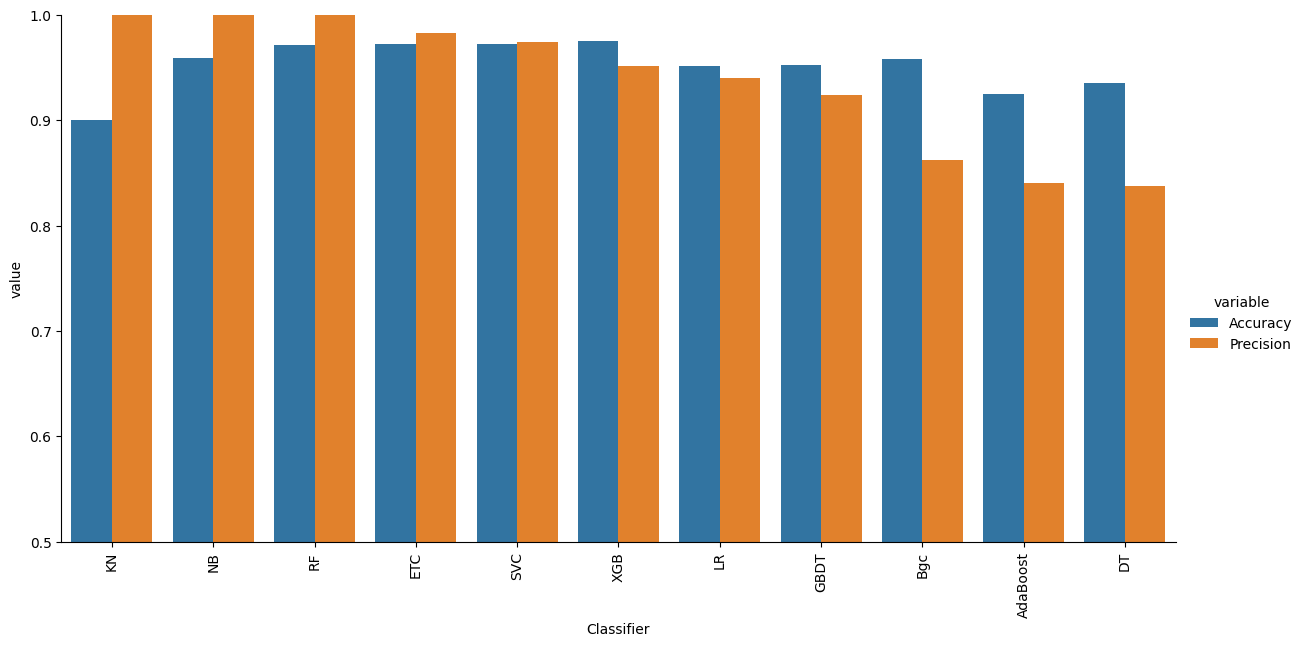

In [163]:
sns.catplot(x='Classifier', y='value', hue='variable', data=performance_df1, kind='bar', height=6, aspect=2)
plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()